# Binomial logistic regression: Customer Churn Prediction
---

For this exercise we will use [this](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) Kaggle dataset in which customer churn data is presented

## Download and Install the libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')

## Download the dataset

Download the dataset (download and upload the dataset).

In [15]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Changing total_charges data type to numeric

In [17]:
df_data.TotalCharges.isnull().sum()

0

In [29]:
# We have null values even if was not shown before
df_data.TotalCharges.loc[df_data.TotalCharges == ' '].count()

11

In [30]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

In [32]:
# We can see the null values fits 
df_data.TotalCharges.isnull().sum()

11

## Null values cleaning

In [34]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
df_data.dropna(inplace=True)

## Deleting id column

In [36]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df_data.drop('customerID',axis=1,inplace=True)

## Changing the data type Churn to numeric

In [38]:
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

In [39]:
df_data_processing = df_data.copy()

## Categorical features management

In [40]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


## Correlation Analysis

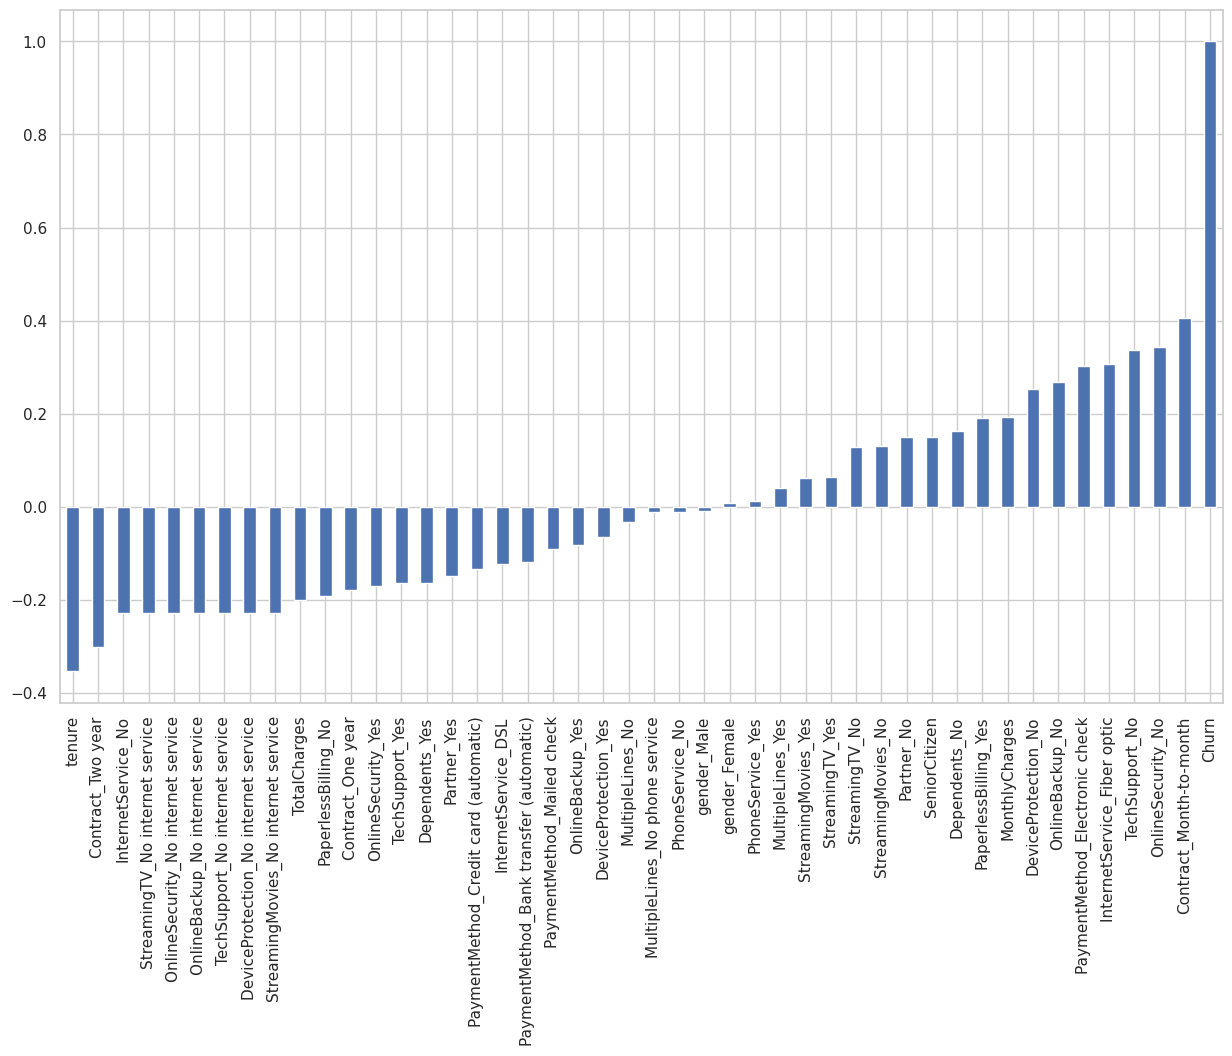

In [42]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Data scalability

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [45]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [46]:
df_data_processing_scaled.columns = df_data_processing.columns

In [47]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## EDA

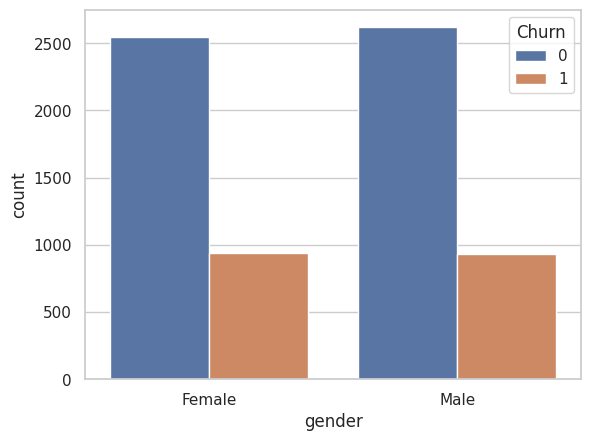

In [48]:
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [49]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column, hue='Churn')
    plt.show()

In [50]:
column_cat = df_data.select_dtypes(include='object').columns

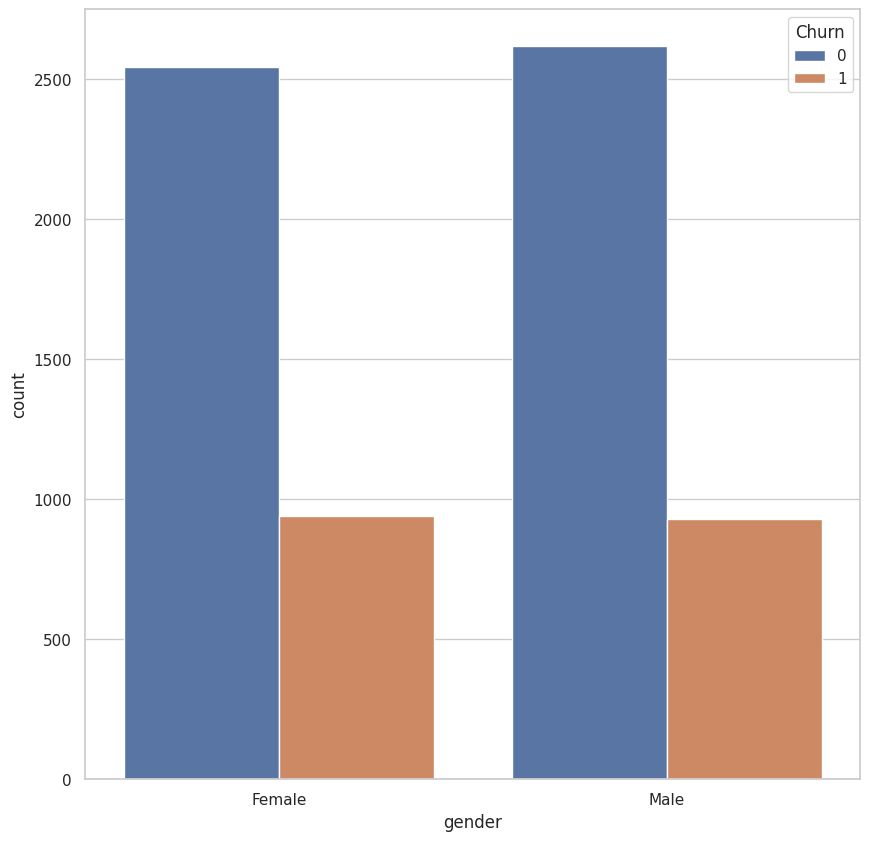

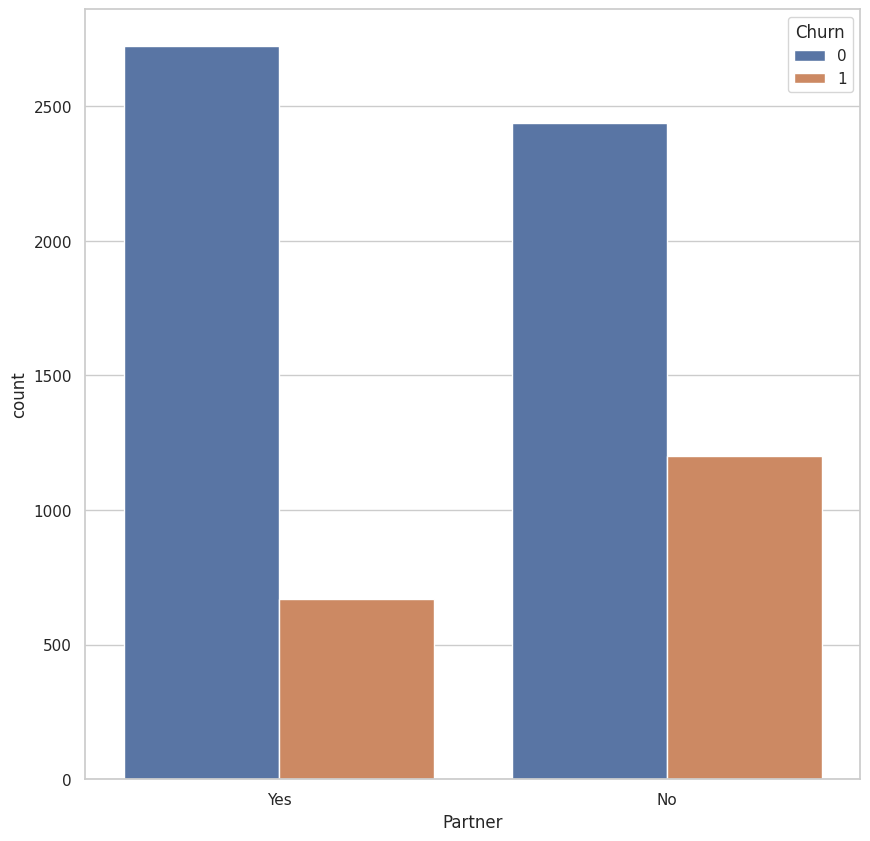

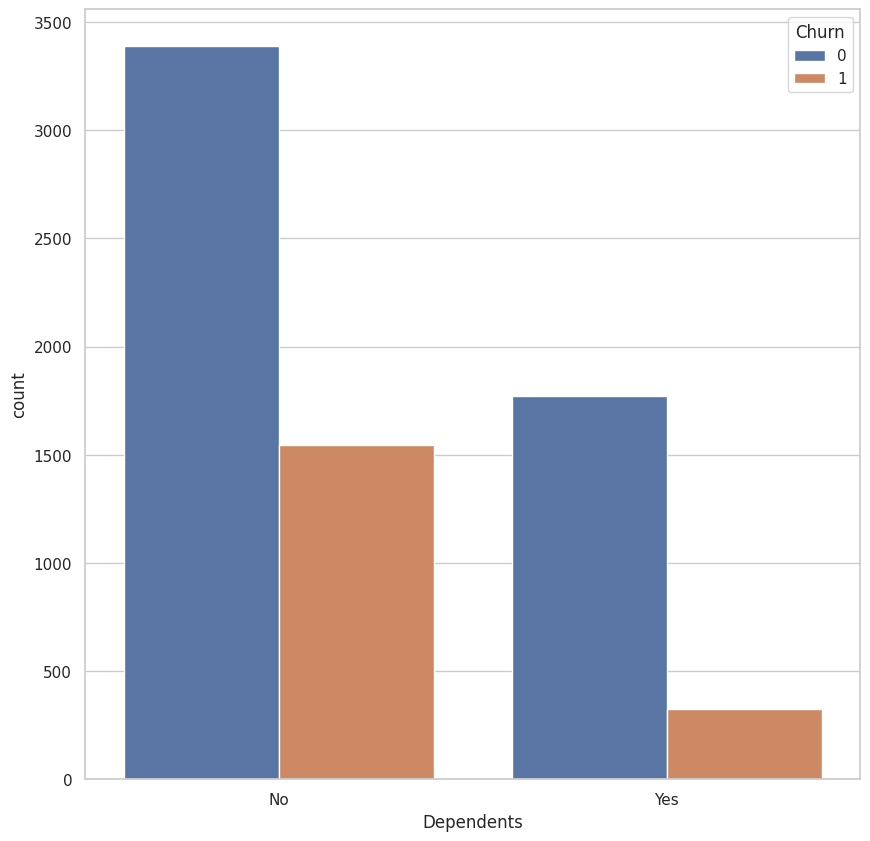

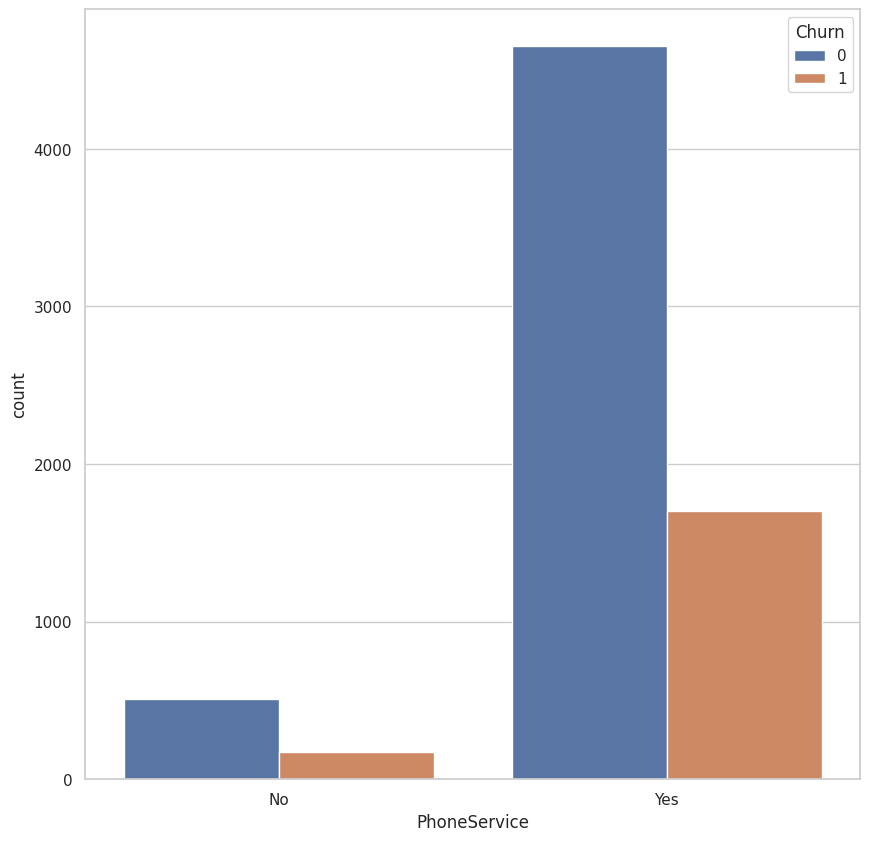

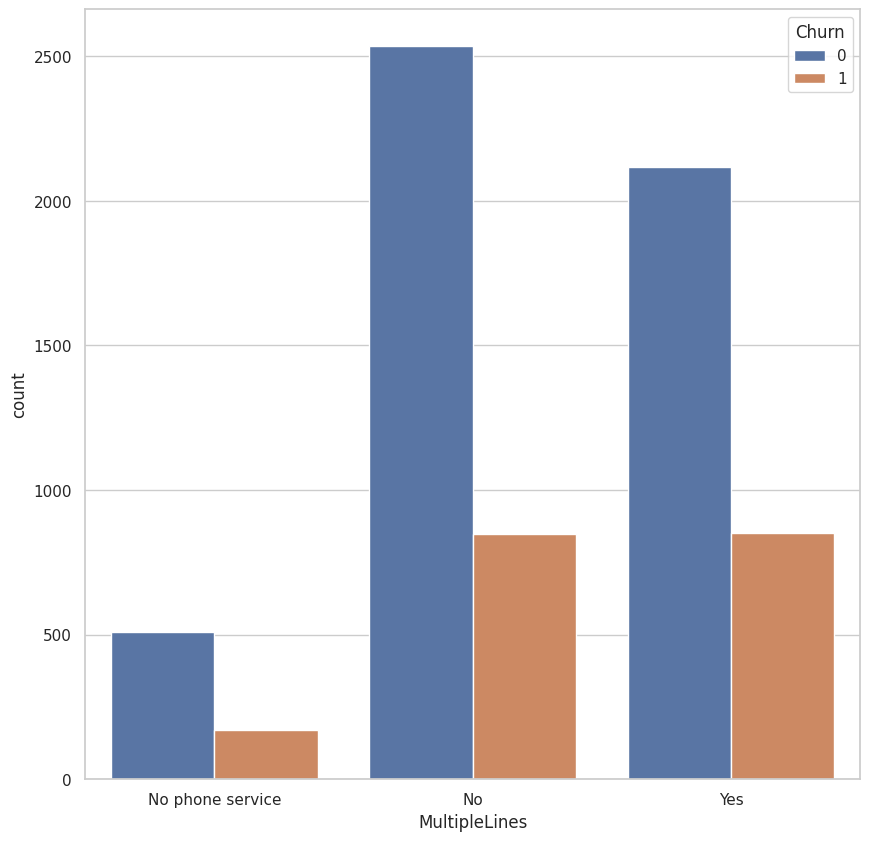

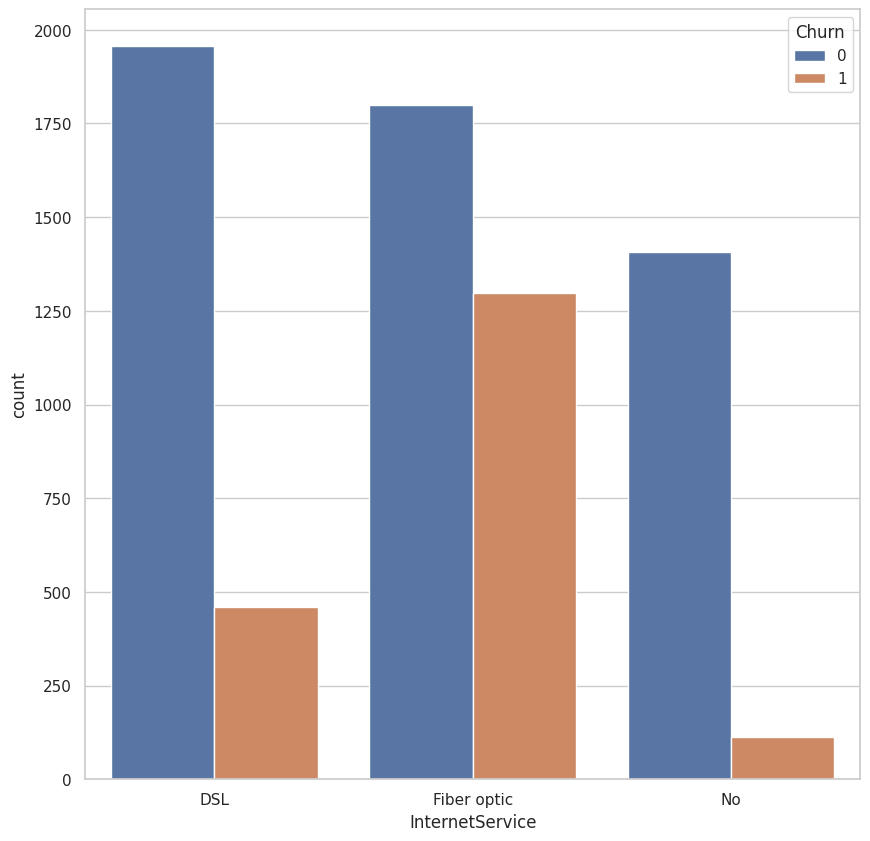

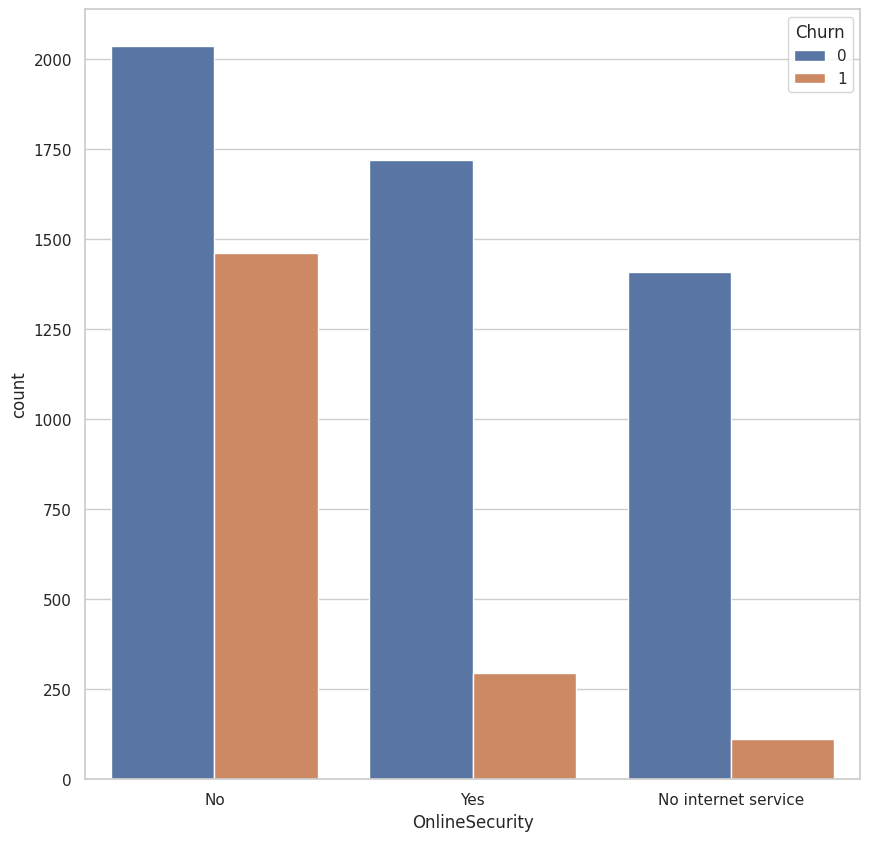

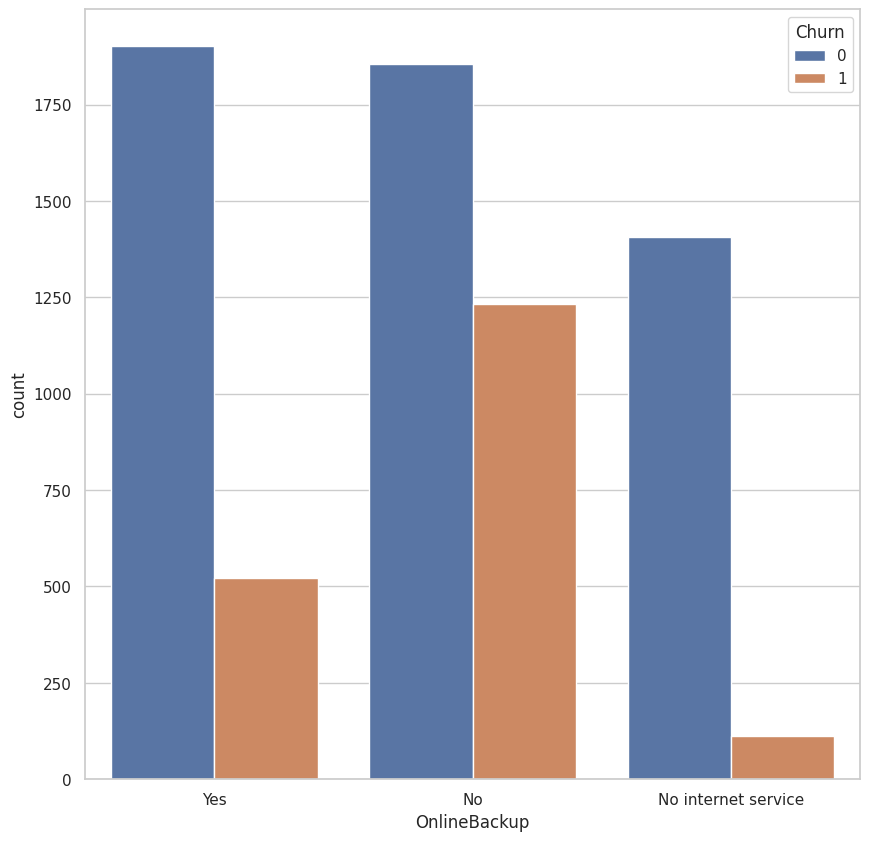

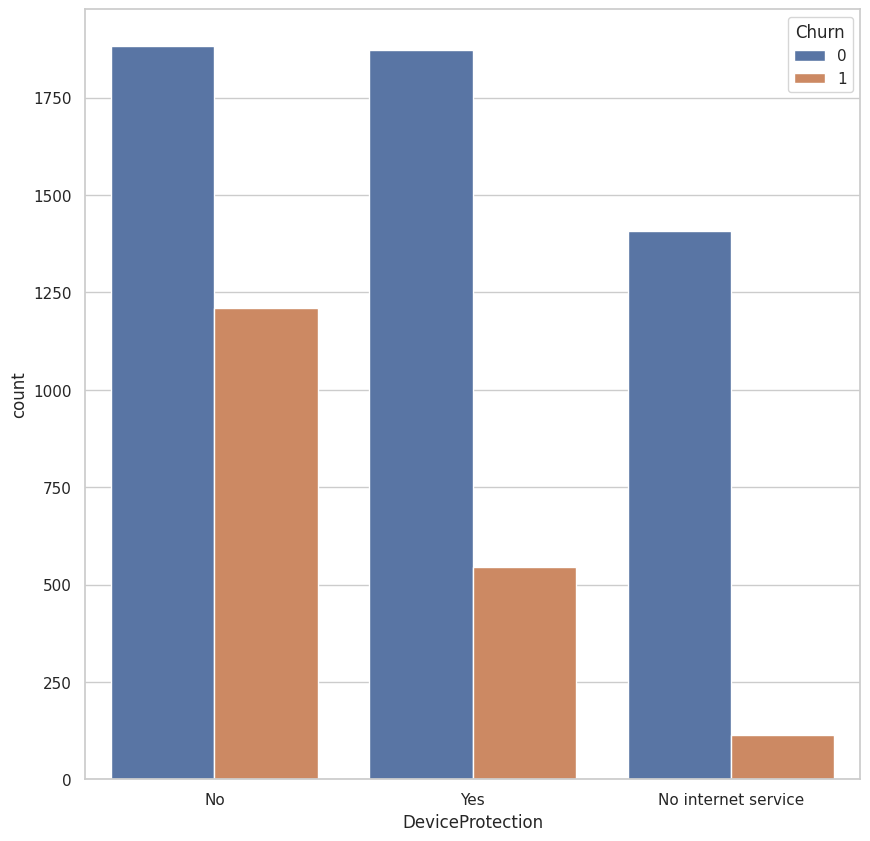

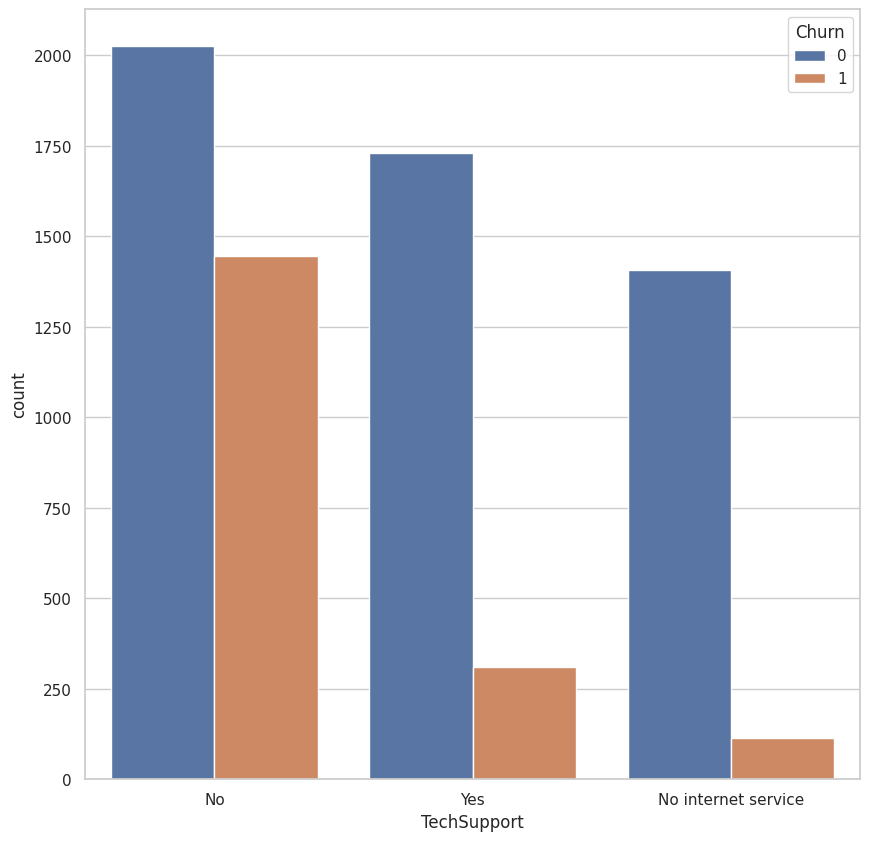

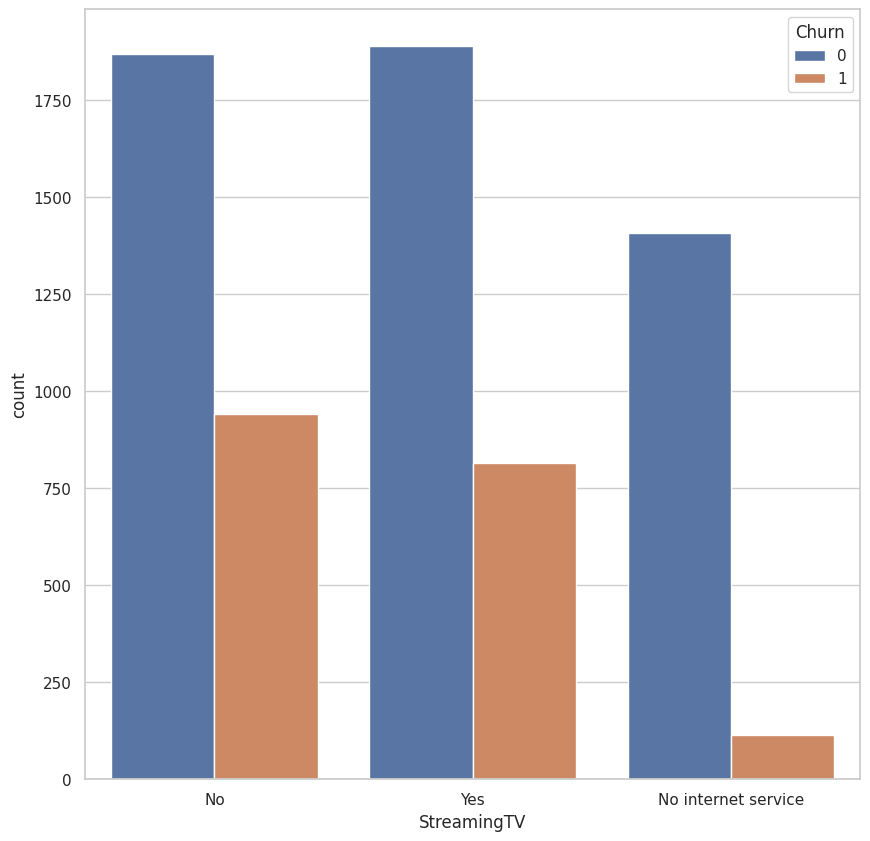

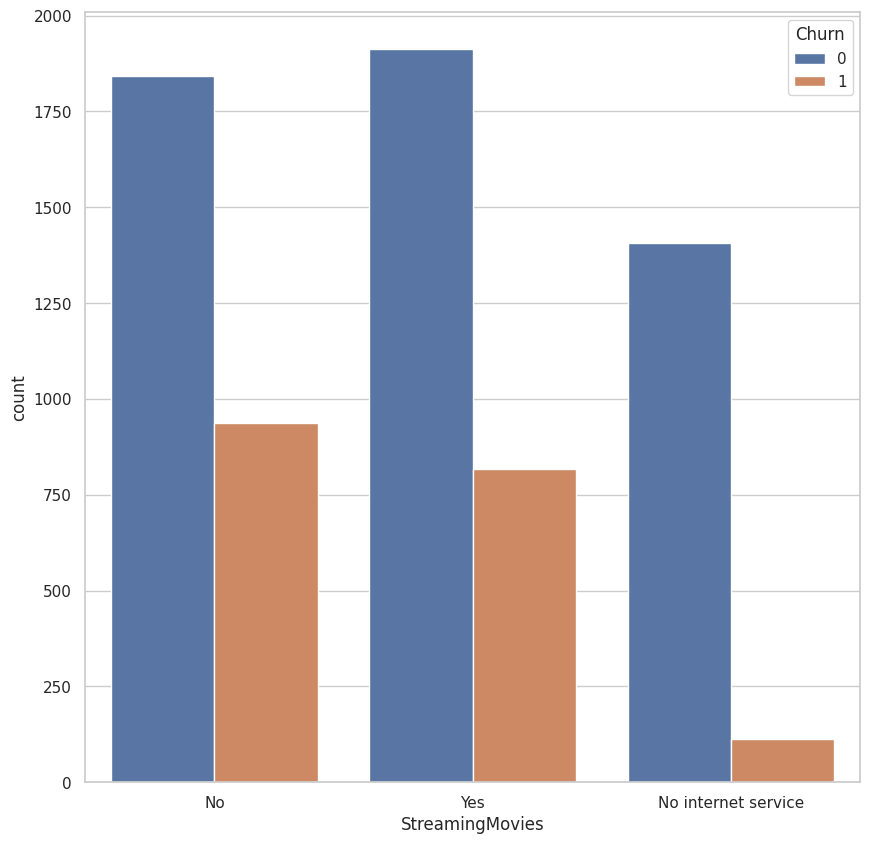

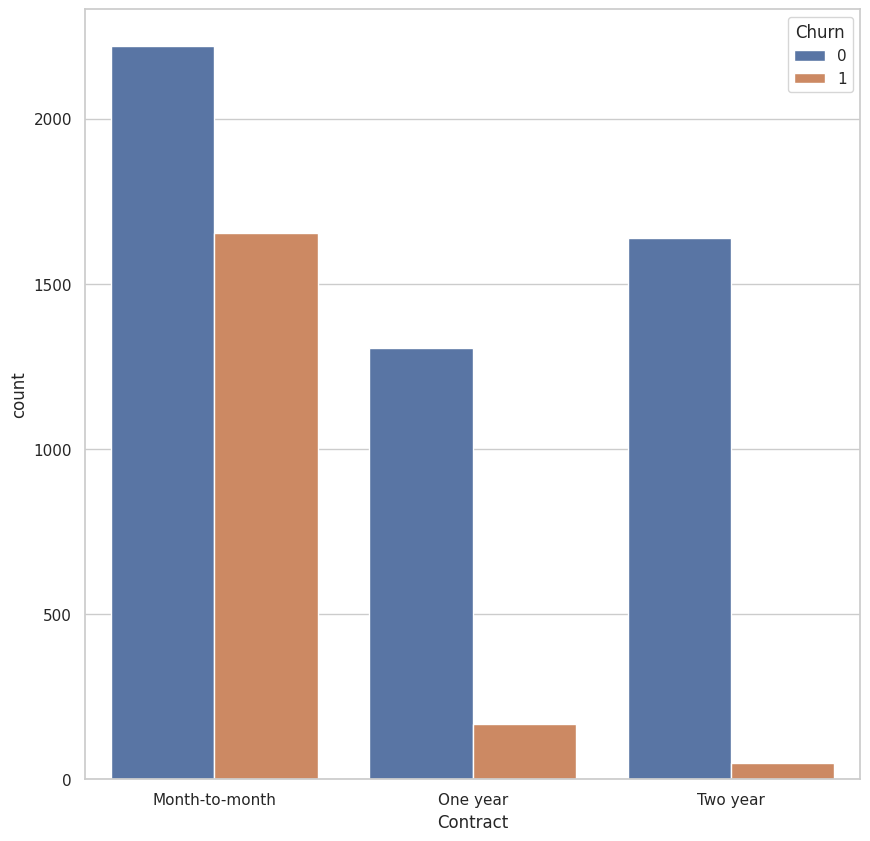

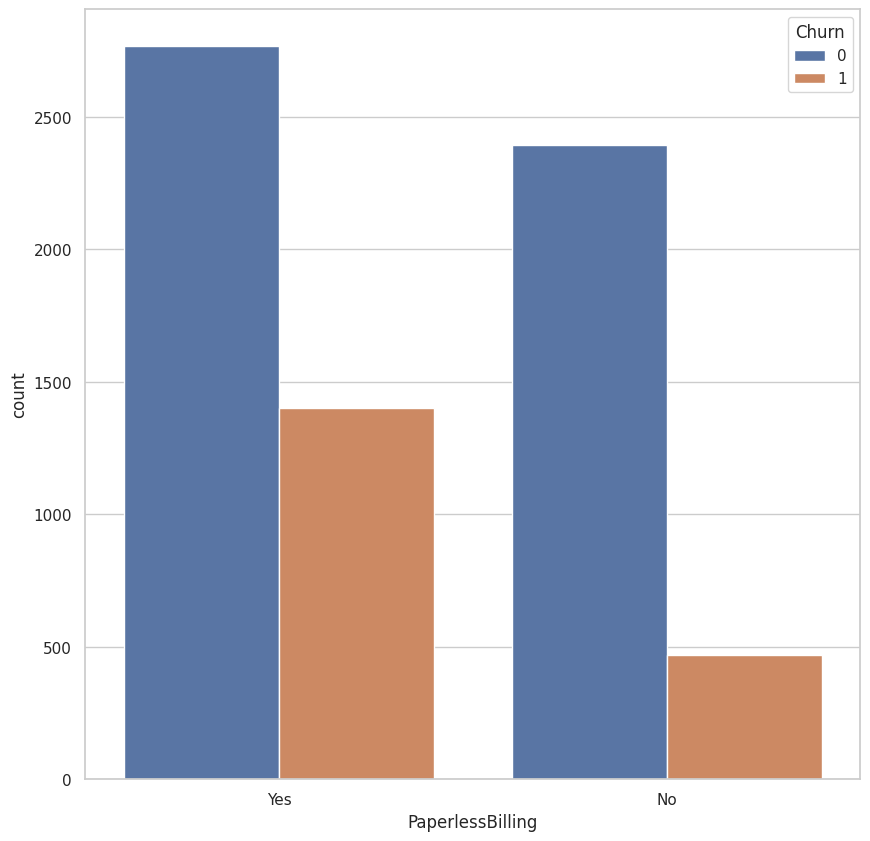

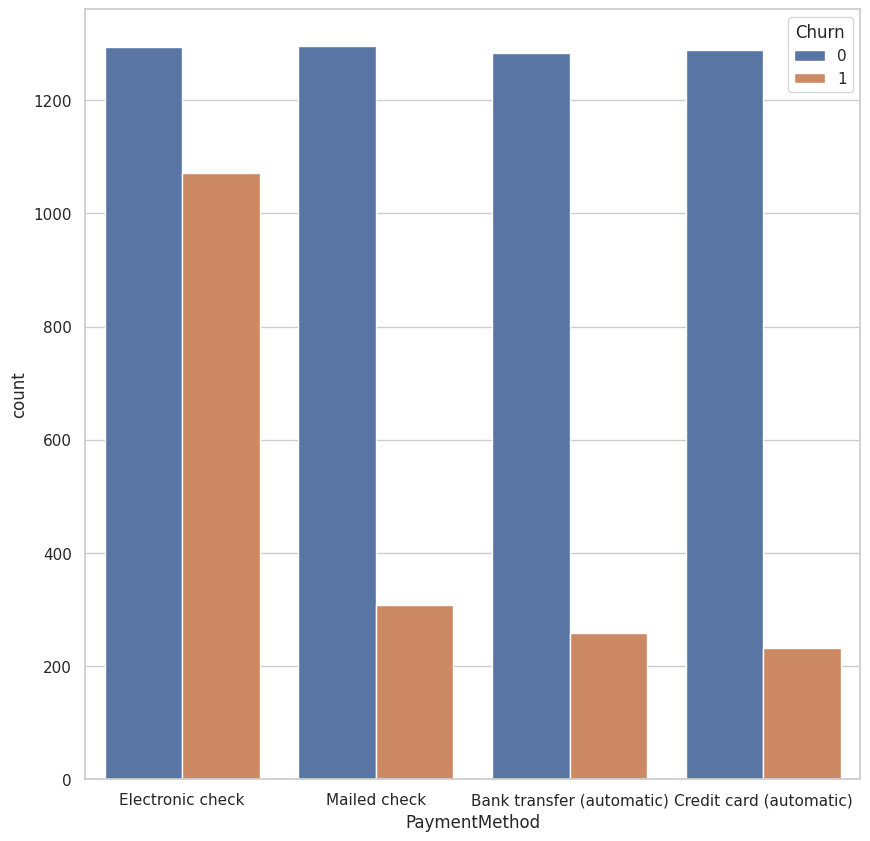

In [51]:
for _ in column_cat:
    plot_categorial(_)

<Figure size 1000x1000 with 0 Axes>

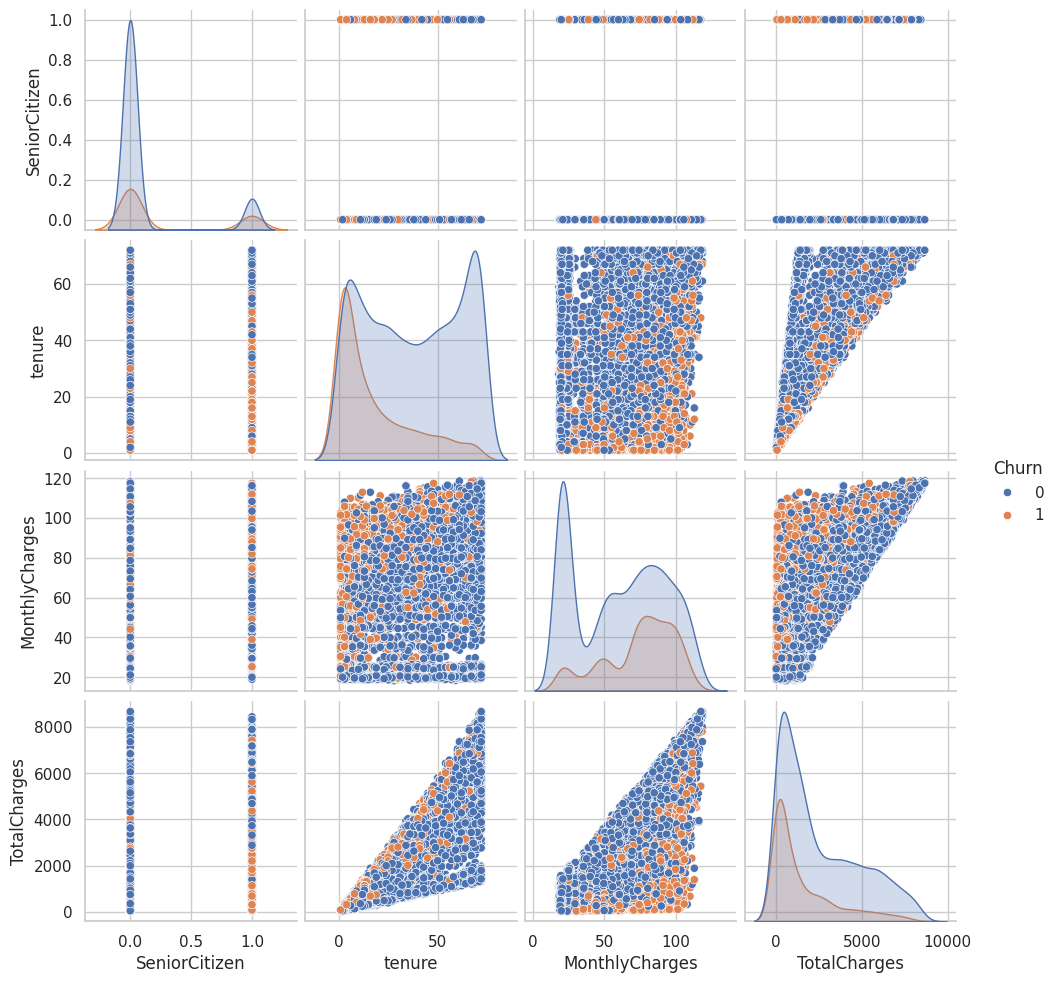

In [52]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Training

In [53]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/home/harold/code/ml_examples/ml_examples/supervised/classification/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795734597156398


## Model Evalutaion

In [58]:
model.predict_proba(X_test)

array([[0.99021178, 0.00978822],
       [0.86177511, 0.13822489],
       [0.30193037, 0.69806963],
       ...,
       [0.9902827 , 0.0097173 ],
       [0.70132401, 0.29867599],
       [0.82865285, 0.17134715]])

In [59]:
model.coef_

array([[ 2.16456863e-01, -3.10072619e+00, -1.62289160e-01,
         1.19636865e+00,  9.42106826e-04, -2.24746731e-02,
        -7.14918978e-02,  4.99593316e-02,  1.16811979e-01,
        -1.38344545e-01,  8.51167182e-02, -1.06649284e-01,
        -1.58852893e-01,  8.51167182e-02,  5.22036086e-02,
        -4.17808514e-01,  5.11412349e-01, -1.15136401e-01,
         2.40093581e-01, -1.15136401e-01, -1.46489747e-01,
         8.40795574e-02, -1.15136401e-01,  9.52427720e-03,
         5.65229519e-02, -1.15136401e-01,  3.70808827e-02,
         2.20219689e-01, -1.15136401e-01, -1.26615854e-01,
        -8.59177562e-02, -1.15136401e-01,  1.79521591e-01,
        -8.76601410e-02, -1.15136401e-01,  1.81263976e-01,
         7.42707114e-01, -9.75362944e-02, -6.66703386e-01,
        -1.13986668e-01,  9.24541022e-02, -2.72331360e-03,
        -1.58696435e-01,  2.16926458e-01, -7.70392758e-02]])

In [60]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


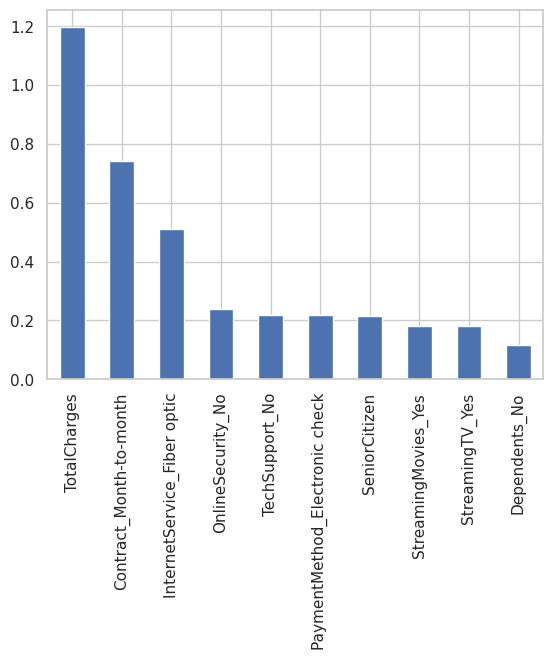

In [61]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


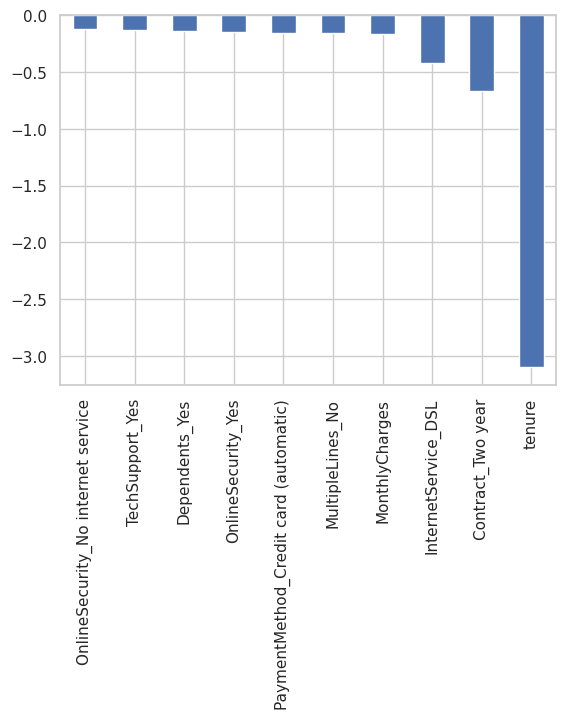

In [62]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

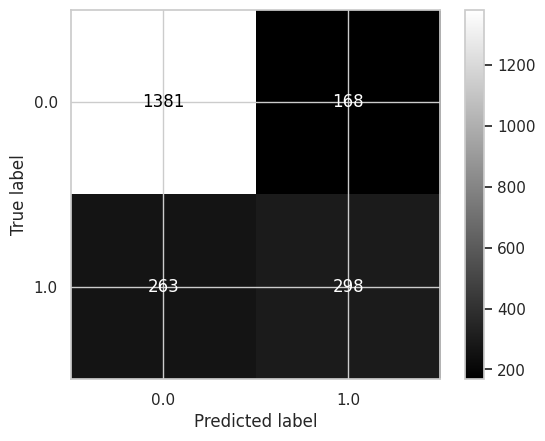

In [64]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()